<img style="width:450px;" src="https://durhamcollege.ca/wp-content/uploads/ai-hub-header.jpg" alt="DC Logo"/>

# LESSON 9 - Practical Regression

## <span style="color: green">OVERVIEW</span>

This lesson takes the content from lessons 6 through 8 and guides you through a practical application of Linear, Logistic, and Polynomial Regression.

## <span style="color: green">SECTION 1</span>

### <span style="color: blue">Linear Regression</span>

In [1]:
# imports
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

# this allows plots to appear directly in the notebook
%matplotlib inline

# Data
Lets take a look at some data, ask some questions and use linear regression to solve said questions

In [2]:
# read data into a DataFrame
data = pd.read_csv('./goog.csv')
data.head(3)

Date    Open    High     Low   Close   Volume
0  26-Feb-16  708.58  713.43  700.86  705.07  2239978
1  25-Feb-16  700.01  705.98  690.58  705.75  1631855
2  24-Feb-16  688.92  700.00  680.78  699.56  1958611

In [3]:
dates = [int(i.split('-')[0]) for i in np.array(data)[:,0]]
prices = np.array(data)[:,1]
# high = np.array(data)[:,2]

prices = np.array([prices]).T
dates = np.array([dates]).T
# high = np.array([high]).T
# prices = np.hstack((prices, high))

print(dates)
print(prices)

[[26]
 [25]
 [24]
 [23]
 [22]
 [19]
 [18]
 [17]
 [16]
 [12]
 [11]
 [10]
 [ 9]
 [ 8]
 [ 5]
 [ 4]
 [ 3]
 [ 2]
 [ 1]]
[[708.58]
 [700.01]
 [688.92]
 [701.45]
 [707.45]
 [695.03]
 [710.0]
 [699.0]
 [692.98]
 [690.26]
 [675.0]
 [686.86]
 [672.32]
 [667.85]
 [703.87]
 [722.81]
 [770.22]
 [784.5]
 [750.46]]


In [4]:
def predict_price(dates, prices, x):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    predicted_price = linear_mod.predict(x)
    return predicted_price, linear_mod.coef_, linear_mod.intercept_
#     return predicted_price, linear_mod

In [5]:
def show_plot(dates, prices):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    plt.scatter(dates, prices, color='lime')
    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    plt.show()
    return

In [6]:
print(predict_price(dates, prices, 39))

(array([[ 664.37196832]]), array([[-1.65535515]]), array([ 728.93081909]))


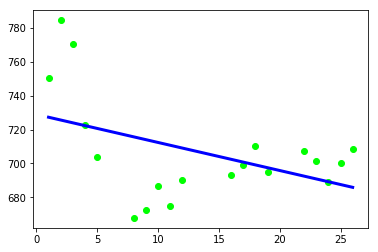

In [7]:
show_plot(dates, prices)

## <span style="color: green">SECTION 2</span>

### <span style="color: blue">Logistic Regression</span>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

In [9]:
# import some data to play with
iris = datasets.load_iris()
df = pd.DataFrame(np.c_[iris.data, iris.target], columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])


data = np.c_[iris.data[:, :2], iris.target] # we only take the first two features.
np.random.shuffle(data)

test_training_split = 0.7

X = data[:, :2]  # we only take the first two features.
y = data[:, 2:]

X_training = X[:int(X.shape[0]*test_training_split),:]
y_training = y[:int(y.shape[0]*test_training_split)]

X_testing = X[int(X.shape[0]*test_training_split):,:]
y_testing = y[int(y.shape[0]*test_training_split):]

## Classes:
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica

## We should now take a look at our data to make sure everything looks okay

In [10]:
print(y_testing)
print(y_testing.ravel())
print(y_testing.shape)

[[ 1.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]]
[ 1.  2.  1.  0.  0.  0.  2.  1.  1.  0.  1.  0.  2.  2.  2.  2.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  2.  2.  1.  1.  2.  2.
  0.  2.  0.  2.  0.  2.  2.  2.  1.]
(45, 1)


## Initializing our logistic regression function imported from sklearn

In [11]:
logreg = linear_model.LogisticRegression()

In [12]:
# We use the initialized function and fit the data.
logreg.fit(X_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
Z = logreg.predict(X_testing)

In [14]:
def classification_rate(y, Z):
    num_right = 0
    for i in range(len(Z)):
        if y[i] == Z[i]:
            num_right = num_right + 1
    return num_right/Z.shape[0]

In [15]:
classification_rate(y_testing.ravel(), Z)

0.7333333333333333

# Well this isn't that great now is it?
## What comes next?

Let's begin implementing k-fold cross validation training and see what our output is

In [16]:
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression

In [17]:
Z_cross_validation = model_selection.cross_val_predict(LogisticRegression(), X, y.ravel(), cv=10)

print(model_selection.cross_val_score(LogisticRegression(), X, y.ravel()))

[ 0.68627451  0.82352941  0.70833333]


In [18]:
classification_rate(y.ravel(), Z_cross_validation)

0.7666666666666667

In [19]:
def show_log_plot(dates, prices):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    plt.scatter(dates, prices, color='lime')
    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    plt.show()
    return

# This is not that much better
#### There are many different classification algorithms sklearn has available to utilize in a much similar way to what was shown above. The following will be touched on in future lessons:
1. SVM
2. Naive Bayes
3. Decision Trees
4. Random Forests
5. Neural Networks

## <span style="color: green">SECTION 3</span>

### <span style="color: blue">Polynomial Regression</span>

In [20]:
import numpy as np
# from scipy.interpolate import *
import matplotlib.pyplot as plt

%matplotlib inline

### We're going to take a look at some synthetic data for this one
Hopefully this will help visualize what's going on a bit better

In [21]:
# Create a couple arrays with 
X = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8,-1])

In [22]:
print(X)
print(y)

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]


Let's begin fitting our data. The polyfit method uses the sum of square errors to compute the line of best fit. In this first piece of code, we're going to stick with a straight line

In [23]:
# The last parameters is a 1 for now as we'll do linear to begin with
p1 = np.polyfit(X, y, 1)

In [24]:
# This just prints the slope and intercept
print(p1)

[-0.30285714  0.75714286]


array([ 0.75714286,  0.45428571,  0.15142857, -0.15142857, -0.45428571,
       -0.75714286])

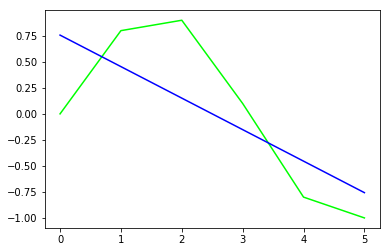

In [25]:
# polyval just helps plot the data with respect to the slope, intercept, and data. 
# r- is just for red line
plt.plot(X, y, color='lime')
plt.plot(X, np.polyval(p1, X), color='blue')
np.polyval(p1, X)

### Now we'll move on to quadratric and cubes functions

In [26]:
p2 = np.polyfit(X, y, 2)
p3 = np.polyfit(X, y, 3)

In [27]:
p1 # y = Ax + b

array([-0.30285714,  0.75714286])

In [28]:
p2 # y = Ax^2 + Bx + C

array([-0.16071429,  0.50071429,  0.22142857])

In [29]:
p3 # y = Ax^3 + Bx^2 + Cx + D

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

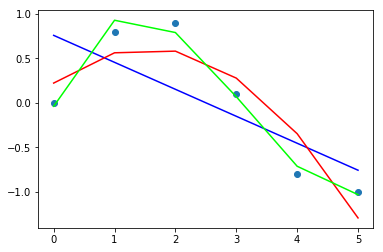

In [30]:
plt.plot(X,y,'o')

xp = X
#xp = np.linspace(-2,6,100)

plt.plot(xp, np.polyval(p1,xp), color='blue')
plt.plot(xp, np.polyval(p2,xp), color='red')
plt.plot(xp, np.polyval(p3,xp), color='lime')

In [31]:
np.polyval(p1,xp)

array([ 0.75714286,  0.45428571,  0.15142857, -0.15142857, -0.45428571,
       -0.75714286])